    分布分析
    分布分析能揭示数据的分布特征和分布类型.
    
    1.对于定量数据,想要了解其分布形式是对称的还是非对称的,发现某些特大或特小的可疑值,可通过绘制
    频率分布表\频率分布直方图\茎叶图进行直观地分析
      注意:选择'组数'和'组距'是做频率分布分析时最主要的问题,一般按照以下的步骤进行:
      1)求极差:最大值-最小值
      2)决定组距和组数:组距根据业务需求来定, 组数=极差/组距(取整数+1)
      3)决定分点:各数据组的边界范围按左闭右开区间，如[a,b)
      4)列出频率分布表:各组频率之和的值为1
      5)绘制频率分布直方图:纵轴表示 频率除以组距 的值
      
      遵循的主要原则如下:
      1)各组之间必须是相互排斥的
      2)各组必须将所有的数据包含在内
      3)各组的组距最好相等
      
    2.对于定性数据,可用饼图和条形图直观地显示分布情况
      饼图的每一个扇形部分代表每一类型的百分比或频数,根据定性变量的类型数目将饼图分成几个部分,每一部分
    的大小与每一类型的频数成正比;
      条形图的高度代表每一类型的百分比或频数,条形图的宽度没有意义

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [96]:
# 读取数据
path = r'C:\Users\HBlock\Desktop\DataFiles\SZ_ES_House_info.csv'
data = pd.read_csv(path,engine='python')
print('查看列名及其类型:',data.dtypes,sep='\n')
data.head()
# 定量字段：房屋单价，参考首付，参考总价，*经度，*纬度，*房屋编码
# 定性字段：小区，朝向

查看列名及其类型:
房屋编码      int64
小区       object
朝向       object
房屋单价      int64
参考首付    float64
参考总价    float64
经度      float64
纬度      float64
dtype: object


,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


In [97]:
# 定量字段--深圳某小区二手房信息  对房屋总价进行分布分析
# 1)求房屋总价极差: max-min  - 定量字段
total_price = '参考总价'
house_price_range = data[total_price].max() - data[total_price].min()  # 175.0
print('房屋总价极差为:',house_price_range)

房屋总价极差为: 175.0


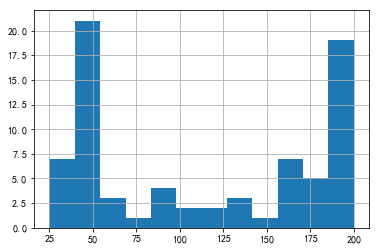

In [98]:
# 频率分布情况 - 定量字段
# 2)通过直方图直接判断分组组数
data[total_price].hist(bins=12)
# 简单查看数据分布，确定分布组数 → 一般8-16即可
# 这里以10组为参考

In [99]:
# 频率分布情况 - 定量字段
# 3)求出分组区间

# pd.cut(x, bins, right)：按照组数对x分组，且返回一个和x同样长度的分组dataframe，right → 是否右边包含，默认True
price_cut = pd.cut(data[total_price],10,right=False)  #
print('price_cut:',price_cut.head(3),sep='\n')

price_cut_count = price_cut.value_counts()  # 统计每组数据的频率,默认降序排列
print('price_cut_count:',price_cut_count,sep='\n')
print('--------------------------------------')

# 给源数据data添加“分组区间”列
data[f'{total_price}分组区间'] = price_cut.values
data.head(3)

price_cut:
0    [42.5, 60.0)
1    [25.0, 42.5)
2    [42.5, 60.0)
Name: 参考总价, dtype: category
Categories (10, interval[float64]): [[25.0, 42.5) < [42.5, 60.0) < [60.0, 77.5) < [77.5, 95.0) ... [130.0, 147.5) < [147.5, 165.0) < [165.0, 182.5) < [182.5, 200.175)]
price_cut_count:
[182.5, 200.175)    20
[42.5, 60.0)        17
[25.0, 42.5)        14
[165.0, 182.5)       8
[147.5, 165.0)       4
[95.0, 112.5)        4
[130.0, 147.5)       3
[112.5, 130.0)       2
[77.5, 95.0)         2
[60.0, 77.5)         1
Name: 参考总价, dtype: int64
--------------------------------------


,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"


In [100]:
# 频率分布情况 - 定量字段
# 4)求出目标字段下频率分布的其他统计量 → 频数，频率，累计频率
frequency_data = pd.DataFrame(price_cut_count)
frequency_data.rename(columns={price_cut_count.name:'频数'},inplace=True)  # 修改列名称为'频数'
print('frequency_data:',frequency_data,sep='\n')

frequency_data['频率'] = frequency_data['频数']/frequency_data['频数'].sum()  # 计算频率
frequency_data['累计频率'] = frequency_data['频率'].cumsum()  # 计算累计频率
frequency_data['频率%'] = frequency_data['频率'].apply(lambda x: "%.2f%%" %(x*100))  # 以百分比显示频率
frequency_data['累计频率%'] = frequency_data['累计频率'].apply(lambda x: "%.2f%%" %(x*100))  # 以百分比显示累计频率

frequency_data
# frequency_data.style.bar(subset=['频率','累计频率'], color='green',width=100)  #可以增加表格样式,不加也可以

frequency_data:
                  频数
[182.5, 200.175)  20
[42.5, 60.0)      17
[25.0, 42.5)      14
[165.0, 182.5)     8
[147.5, 165.0)     4
[95.0, 112.5)      4
[130.0, 147.5)     3
[112.5, 130.0)     2
[77.5, 95.0)       2
[60.0, 77.5)       1


,频数,频率,累计频率,频率%,累计频率%
"[182.5, 200.175)",20,0.266667,0.266667,26.67%,26.67%
"[42.5, 60.0)",17,0.226667,0.493333,22.67%,49.33%
"[25.0, 42.5)",14,0.186667,0.680000,18.67%,68.00%
"[165.0, 182.5)",8,0.106667,0.786667,10.67%,78.67%
"[147.5, 165.0)",4,0.053333,0.840000,5.33%,84.00%
"[95.0, 112.5)",4,0.053333,0.893333,5.33%,89.33%
"[130.0, 147.5)",3,0.040000,0.933333,4.00%,93.33%
"[112.5, 130.0)",2,0.026667,0.960000,2.67%,96.00%
"[77.5, 95.0)",2,0.026667,0.986667,2.67%,98.67%
"[60.0, 77.5)",1,0.013333,1.000000,1.33%,100.00%


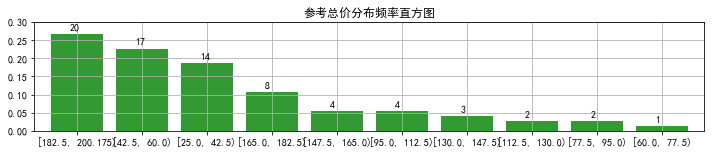

In [101]:
# 频率分布情况 - 定量字段
# 5)绘制频率直方图
frequency_data['频率'].plot(kind='bar',
                          figsize=(12,2),
                          alpha=0.8,
                          color='g',
                          grid=True,
                          rot=0,
                          width=0.8)
# 修改y轴刻度
y_lim = np.linspace(0,0.30,7)
plt.yticks(y_lim)
plt.title('参考总价分布频率直方图')

# 添加频数标签
x = len(frequency_data)
y = frequency_data['频率']
m = frequency_data['频数']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i' % k, color = 'k')
plt.show()


In [102]:
# 频率分布情况 - 定性字段
# 1)通过计数统计判断不同类别的频率

cx_g = data['朝向'].value_counts(sort=True)
print('cx_g:',cx_g,sep='\n')
# 统计频率

r_cx = pd.DataFrame(cx_g)
r_cx.rename(columns ={cx_g.name:'频数'}, inplace = True)  # 修改频数字段名
r_cx['频率'] = r_cx / r_cx['频数'].sum()  # 计算频率
r_cx['累计频率'] = r_cx['频率'].cumsum()  # 计算累计频率
r_cx['频率%'] = r_cx['频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示频率
r_cx['累计频率%'] = r_cx['累计频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示累计频率
r_cx

# r_cx.style.bar(subset=['频率','累计频率'], color='#d65f5f',width=100)  # 可视化显示

cx_g:
南北    29
南     20
东      8
东南     5
西南     4
北      4
西北     3
东西     1
东北     1
Name: 朝向, dtype: int64


,频数,频率,累计频率,频率%,累计频率%
南北,29,0.386667,0.386667,38.67%,38.67%
南,20,0.266667,0.653333,26.67%,65.33%
东,8,0.106667,0.760000,10.67%,76.00%
东南,5,0.066667,0.826667,6.67%,82.67%
西南,4,0.053333,0.880000,5.33%,88.00%
北,4,0.053333,0.933333,5.33%,93.33%
西北,3,0.040000,0.973333,4.00%,97.33%
东西,1,0.013333,0.986667,1.33%,98.67%
东北,1,0.013333,1.000000,1.33%,100.00%


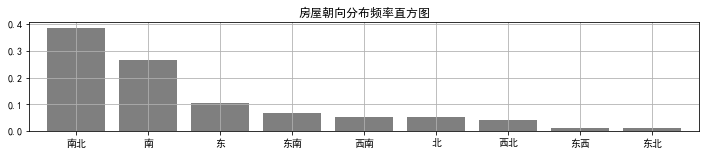

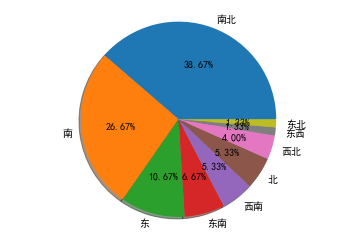

In [103]:
# 频率分布情况 - 定性字段
# 2)绘制频率直方图、饼图

plt.figure(num = 1,figsize = (12,2))
# 绘制直方图
r_cx['频率'].plot(kind = 'bar',
                 width = 0.8,
                 rot = 0,
                 color = 'k',
                 grid = True,
                 alpha = 0.5)
plt.title('房屋朝向分布频率直方图')


plt.figure(num = 2)
# 绘制饼图
plt.pie(r_cx['频数'],
       labels = r_cx.index,
       autopct='%.2f%%',
       shadow = True)
plt.axis('equal')

plt.show()